<a href="https://colab.research.google.com/github/Vixuz144/Simu2/blob/main/Ejemplo_Epidemiol%C3%B3gico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

In [ ]:
test_totales = 50
test_positivos = 10

In [ ]:
with pm.Model() as modelo_test_perfecto:
    #Variable que queremos estimar, le damos una probabilidad apriori (uniforme)
    prob = pm.Uniform(name = 'prob',
                      lower = 0, #Condiciones de probabilidad 0 <= p <= 1
                      upper = 1)

    #Distribución de los datos (Likelihood) ¿Cómo se generan los datos?
    casos_positivos = pm.Binomial(name = 'casos_positivos',
                                  p = prob, #Variable a estimar
                                  n = test_totales,
                                  observed = test_positivos)
    trace_test_perfecto = pm.sample(10**4)

Output()

Output()

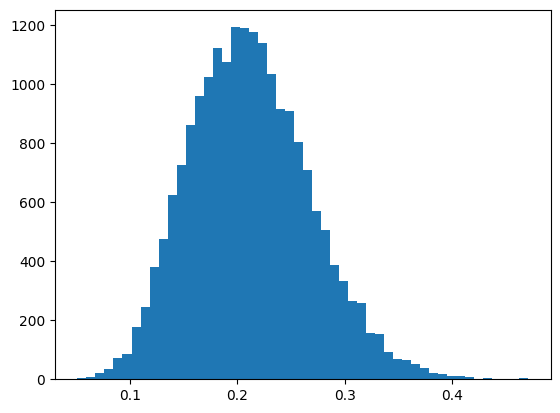

In [ ]:
posterior = trace_test_perfecto.posterior.stack(sample=['chain', 'draw'])
# print(posterior)
x = posterior['prob']
plt.hist(x, bins = 50)
plt.show()

Cual es la probabilidad de que menos del 15% de la población se haya contagiado.

In [ ]:
print(len(x[x<0.15]) / len(x))

0.13505


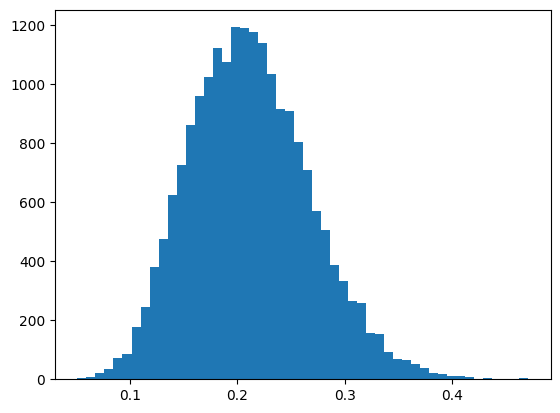

In [ ]:
a = trace_test_perfecto.to_dataframe()
x = a[('posterior', 'prob')]
plt.hist(x, bins = 50)
plt.show()

Cual es la probabilidad de que menos del 15% de la población se haya contagiado.

In [ ]:
print(len(x[x<0.15]) / len(x))

0.13505


#Modelo con falsos positivos

In [ ]:
with pm.Model() as modelo_con_fp:
    #Variable que queremos estimar, le damos una probabilidad apriori (uniforme)
    prob_cov = pm.Uniform(name = 'prob',
                      lower = 0, #Condiciones de probabilidad 0 <= p <= 1
                      upper = 1)

    #Probabilidad de falso positivo y la modificacion a la probabilidad de casos positivos
    prob_fp= 0.1
    prob_test_positivo = prob_cov + (1 - prob_cov)*prob_fp
    #Distribución de los datos (Likelihood) ¿Cómo se generan los datos?
    casos_positivos = pm.Binomial(name = 'casos_positivos',
                                  p = prob_test_positivo, #Variable a estimar
                                  n = test_totales,
                                  observed = test_positivos)
    trace_test_fp = pm.sample(10**4)

Output()

Output()

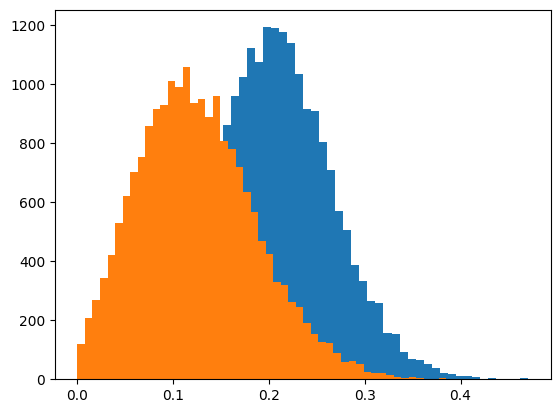

In [ ]:
posteriorfp = trace_test_fp.posterior.stack(sample=['chain', 'draw'])
# print(posterior)
y = posteriorfp['prob']
plt.hist(x,bins = 50)
plt.hist(y, bins = 50)
plt.show()

In [ ]:
print(len(y[y<0.15]) / len(y))

0.6746


#Incertidumbre de falsos positivos


In [ ]:
lab_fp_obs = 10
lab_test_hechos = 100

In [ ]:
with pm.Model() as modelo_con_incertidumbre:
    #Modelo para calcular la tasa de falsos positivos
    prob_fp = pm.Uniform(name = 'prob_fp',
                      lower = 0, #Condiciones de probabilidad 0 <= p <= 1
                      upper = 1)

    test_fp = pm.Binomial(name = 'test_fp',
                          p = prob_fp,
                          n = lab_test_hechos,
                          observed = lab_fp_obs)


    #Modelo para calcular la proporción de personas con covid
    prob_cov = pm.Uniform(name = 'prob_cov',
                      lower = 0,
                      upper = 1)

    prob_test_positivo = prob_cov + (1 - prob_cov)*prob_fp
    casos_positivos = pm.Binomial(name = 'casos_positivos',
                                  p = prob_test_positivo,
                                  n = test_totales,
                                  observed = test_positivos)
    trace_test_incer = pm.sample(10**4)

Output()

Output()

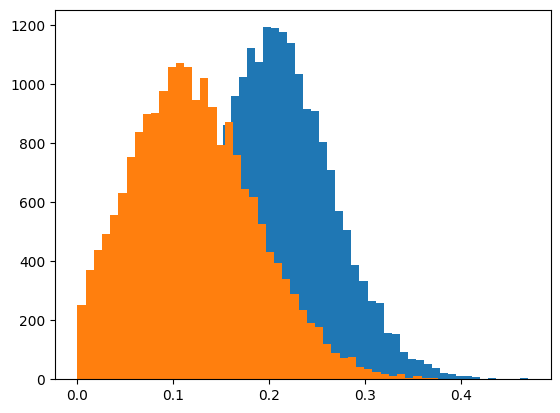

In [ ]:
post_incer = trace_test_incer.posterior.stack(sample=['chain', 'draw'])
# print(posterior)
z = post_incer['prob_cov']
plt.hist(x,bins = 50)
plt.hist(z, bins = 50)
plt.show()

In [ ]:
print(len(z[z<0.15]) / len(z))

0.67995
